<a href="https://colab.research.google.com/github/KHUSH445/ML_LAB/blob/main/GD_HousePricePrediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

House price Prediction using gradient descent algorithm

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving output.csv to output (1).csv
Saving data.csv to data (1).csv


In [ ]:
import numpy as np

# ====== Assume your data is already preprocessed ======
# X = feature matrix (num_samples x num_features)
# y = target vector (num_samples,)
# For demonstration, let's create dummy data
np.random.seed(42)
X = np.random.rand(100, 3)  # 100 samples, 3 features
y = 200000 + X @ np.array([50000, 100000, 150000]) + np.random.randn(100) * 10000  # House prices

# ====== Add a column of ones for bias term ======
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Shape: (100, 4)

# ====== Gradient Descent Parameters ======
learning_rate = 0.01
n_iterations = 1000
m = X_b.shape[0]
theta = np.zeros(X_b.shape[1])  # Initialize weights (including bias) as zeros

# ====== Gradient Descent Loop ======
for iteration in range(n_iterations):
    gradients = (2/m) * X_b.T @ (X_b @ theta - y)
    theta = theta - learning_rate * gradients

# ====== Results ======
print("Learned parameters (including bias):", theta)

# Example prediction
sample = np.array([1, 0.5, 0.2, 0.1])  # 1 for bias, then feature values
predicted_price = sample @ theta
print("Predicted house price:", predicted_price)


Learned parameters (including bias): [198005.95793792  60362.09714283  98862.78737007 146671.18241141]
Predicted house price: 262626.6822244882


Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# load CSVs (adjust filenames if different)
X_df = pd.read_csv("data.csv")
y_df = pd.read_csv("output.csv")

print("X shape:", X_df.shape)
print("y shape:", y_df.shape)
print("\nX columns:", X_df.columns.tolist())
print("\ny head:\n", y_df.head())

X shape: (4600, 18)
y shape: (4600, 18)

X columns: ['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country']

y head:
                   date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   

Merge / prepare target & feature DataFrame

In [ ]:
if y_df.shape[1] == 1:
    target_col = y_df.columns[0]
else:
    # if there are multiple columns, choose the first (adjust if needed)
    target_col = 'price' # Changed target_col to 'price'

print("Target column:", target_col)

# Create a single DataFrame by dropping the redundant columns in y_df and joining on index
df = X_df.copy()
# Ensure 'price' column from y_df is correctly assigned to df
df[target_col] = y_df[target_col] # Correctly assign 'price' from y_df
print("Combined shape:", df.shape)

# Quick glance
display(df.head())
display(df.info())
display(df.describe())

Target column: price
Combined shape: (4600, 18)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

None

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [ ]:
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract numeric features from date
df['year']  = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day']   = df['date'].dt.day

# Drop original date column
df = df.drop(columns=['date'])

# Separate features (X) and target (y)
X = df.drop(columns=[target_col])
y = df[target_col]

# For feature columns, fill numeric NaNs with median and encode categorical
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()


print("Numeric features:", num_cols)
print("Categorical features:", cat_cols)

# Fill numeric missing with median
for c in num_cols:
    if X[c].isna().any():
        X[c].fillna(X[c].median(), inplace=True)

# One-hot encode categorical features (if any)
if len(cat_cols) > 0:
    X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

print("After encoding shape:", X.shape)

Numeric features: ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'year', 'month', 'day']
Categorical features: ['street', 'city', 'statezip', 'country']
After encoding shape: (4600, 4658)


Train/test split & scaling

In [ ]:
# Colab Cell 5 - Train/Test Split & Scaling with date handling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepare feature and target arrays
# X = df.drop(columns=[target_col]).values.astype(float) # Redundant, X already defined in previous cell
y = y.values.reshape(-1, 1).astype(float) # Use the y defined in the previous cell

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shapes:", X_train.shape, y_train.shape)
print("Test shapes:", X_test.shape, y_test.shape)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Add bias column (ones)
X_train_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_b  = np.c_[np.ones((X_test_scaled.shape[0], 1)),  X_test_scaled]

print("X_train_b shape (with bias):", X_train_b.shape)
print("X_test_b shape (with bias):", X_test_b.shape)

Train shapes: (3680, 4658) (3680, 1)
Test shapes: (920, 4658) (920, 1)
X_train_b shape (with bias): (3680, 4659)
X_test_b shape (with bias): (920, 4659)


In [ ]:
# Gradient Descent function
def gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    m = X.shape[0]
    theta = np.zeros((X.shape[1], 1))  # column vector
    for i in range(n_iterations):
        gradients = (2/m) * X.T.dot(X.dot(theta) - y)
        theta = theta - learning_rate * gradients
    return theta

# Train model
theta = gradient_descent(X_train_b, y_train, learning_rate=0.01, n_iterations=1000)

print("Learned parameters (theta):", theta.ravel()[:5], "...")  # show first few

Learned parameters (theta): [544848.26791558  10255.5244854   25057.24818787  77817.76494818
   4693.61035991] ...


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np # Import numpy here

# Predictions
y_train_pred = X_train_b.dot(theta)
y_test_pred = X_test_b.dot(theta)

# Evaluation
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("R² Score:", r2)

Train MSE: 1366846889.8150637
Test MSE: 962218992243.7151
R² Score: 0.05650591229098889


In [ ]:
def gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    m = X.shape[0]
    theta = np.zeros((X.shape[1], 1))  # column vector
    for i in range(n_iterations):
        gradients = (2/m) * X.T.dot(X.dot(theta) - y)
        theta = theta - learning_rate * gradients
    return theta

def bias_variance_decomposition(X, y, learning_rate=0.01, n_iterations=1000, n_rounds=10):
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import mean_squared_error

    predictions = []
    y_vals = None

    for i in range(n_rounds):
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)
        X_train_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
        X_val_b = np.c_[np.ones((X_val_scaled.shape[0], 1)), X_val_scaled]

        theta = gradient_descent(X_train_b, y_train, learning_rate, n_iterations)
        y_pred_val = X_val_b.dot(theta)

        predictions.append(y_pred_val.flatten())
        y_vals = y_val.flatten()

    predictions = np.array(predictions)
    mean_pred = np.mean(predictions, axis=0)

    # Bias² = mean squared difference between average prediction and true value
    bias_sq = np.mean((mean_pred - y_vals) ** 2)
    # Variance = variance of predictions for each point averaged
    variance = np.mean(np.var(predictions, axis=0))
    total_error = bias_sq + variance

    print("\nBias²:", bias_sq)
    print("Variance:", variance)
    print("Total Error (Bias² + Variance):", total_error)
    return bias_sq, variance, total_error

bias_sq, variance, total_error = bias_variance_decomposition(X, y)


Bias²: 118940786218.98557
Variance: 52828799286.2509
Total Error (Bias² + Variance): 171769585505.23645


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predictions
y_train_pred = X_train_b.dot(theta)
y_test_pred  = X_test_b.dot(theta)

# Evaluation Metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse  = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse  = np.sqrt(test_mse)
r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)

print("🔹 Training MSE:", train_mse)
print("🔹 Testing  MSE:", test_mse)
print("🔹 Training RMSE:", train_rmse)
print("🔹 Testing  RMSE:", test_rmse)
print("🔹 R² (Train Accuracy):", r2_train)
print("🔹 R² (Test  Accuracy):", r2_test)


🔹 Training MSE: 1366846889.8150637
🔹 Testing  MSE: 962218992243.7151
🔹 Training RMSE: 36970.89246711612
🔹 Testing  RMSE: 980927.6182490302
🔹 R² (Train Accuracy): 0.9903801366835882
🔹 R² (Test  Accuracy): 0.05650591229098889


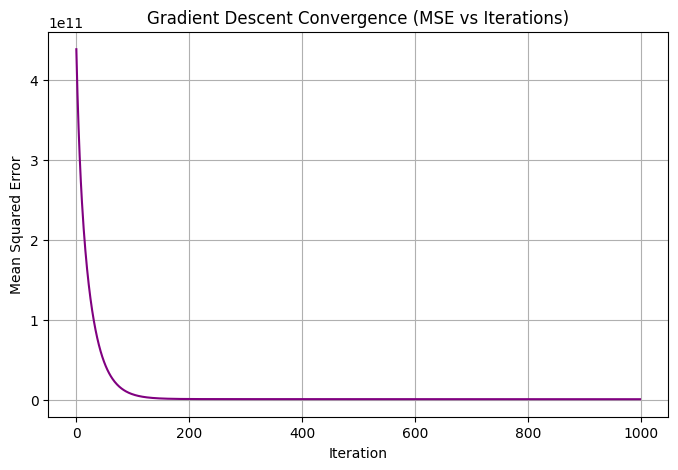

In [ ]:
import matplotlib.pyplot as plt

def gradient_descent_with_tracking(X, y, learning_rate=0.01, n_iterations=1000):
    m = X.shape[0]
    theta = np.zeros((X.shape[1], 1))
    loss_history = []

    for i in range(n_iterations):
        predictions = X.dot(theta)
        error = predictions - y
        gradients = (2/m) * X.T.dot(error)
        theta = theta - learning_rate * gradients

        # Compute MSE for tracking
        mse = np.mean(error ** 2)
        loss_history.append(mse)

    return theta, loss_history

# Re-train model with loss tracking
theta, loss_history = gradient_descent_with_tracking(X_train_b, y_train, learning_rate=0.01, n_iterations=1000)

# Plot the loss curve
plt.figure(figsize=(8,5))
plt.plot(range(len(loss_history)), loss_history, color='purple')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Gradient Descent Convergence (MSE vs Iterations)")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predictions
y_train_pred = X_train_b.dot(theta)
y_test_pred = X_test_b.dot(theta)

# Metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse  = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse  = np.sqrt(test_mse)
r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)

print("🔹 Training MSE:", train_mse)
print("🔹 Testing  MSE:", test_mse)
print("🔹 Training RMSE:", train_rmse)
print("🔹 Testing  RMSE:", test_rmse)
print("🔹 R² (Train Accuracy):", r2_train)
print("🔹 R² (Test  Accuracy):", r2_test)


🔹 Training MSE: 1366846889.8150637
🔹 Testing  MSE: 962218992243.7151
🔹 Training RMSE: 36970.89246711612
🔹 Testing  RMSE: 980927.6182490302
🔹 R² (Train Accuracy): 0.9903801366835882
🔹 R² (Test  Accuracy): 0.05650591229098889


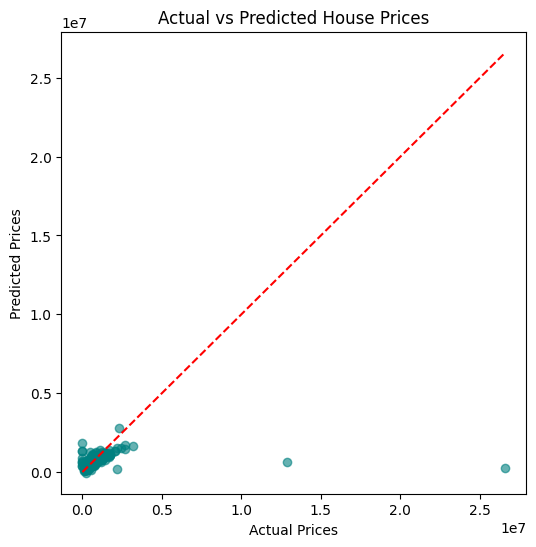

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color="teal")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="--")
plt.show()
